In [9]:
from astropy.io import fits

In [10]:
import astropy
print(astropy.__version__)


7.0.0


In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [13]:
file = fits.open("AS1G02_010T01_9000000252lxp1EA_level1.fits")


In [14]:
file.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11fa6dc10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11fa85310>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11fa74a10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11fa76e90>]>

In [15]:
file[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'ASTROSAT'                                                            
ORIGIN  = 'ASTROSAT-LAXPC-L1'  / Configuration Control                          
CREATOR = 'LAXPC-L1'                                                            
TELESCOP= 'ASTROSAT'                                                            
INSTRUME= 'LAXPC1  '                                                            
DATE    = '2016-01-08T02:21:55' / file creation date (YYYY-MM-DDThh:mm:ss UTC)  
DATE-OBS= '2016-01-07'      

In [18]:
with fits.open('AS1G02_010T01_9000000252lxp1EA_level1.fits') as file:
    primary_hdu = file[0]
    print(primary_hdu.data)  # This should print 'None' if there's no data
    print(primary_hdu.header)

None
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H MISSION = 'ASTROSAT'                                                            ORIGIN  = 'ASTROSAT-LAXPC-L1'  / Configuration Control                          CREATOR = 'LAXPC-L1'                                                            TELESCOP= 'ASTROSAT'                                                            INSTRUME= 'LAXPC1  '                                                            DATE    = '2016-01-08T02:21:55' / file creation date (YYYY-MM-DDThh:mm:ss UTC)  DATE-OBS= '2016-01-07'         / St

In [19]:
with fits.open('AS1G02_010T01_9000000252lxp1EA_level1.fits') as file:
    for i, hdu in enumerate(file):
        print(f"HDU {i}:")
        print(f"Header: {hdu.header}")
        print(f"Data type: {type(hdu.data)}")


HDU 0:
Header: SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H MISSION = 'ASTROSAT'                                                            ORIGIN  = 'ASTROSAT-LAXPC-L1'  / Configuration Control                          CREATOR = 'LAXPC-L1'                                                            TELESCOP= 'ASTROSAT'                                                            INSTRUME= 'LAXPC1  '                                                            DATE    = '2016-01-08T02:21:55' / file creation date (YYYY-MM-DDThh:mm:ss UTC)  DATE-OBS= '2016-01-07'   

In [20]:
with fits.open('AS1G02_010T01_9000000252lxp1EA_level1.fits') as file:
    # Access HDU 1
    hdu1 = file[1]
    
    # Print the binary table structure
    print(hdu1.columns)  # Display column names and formats

    # Access the data
    data = hdu1.data  # This is a structured array
    print(data)  

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'GRT'; format = '7J'
    name = 'FrameSequenceNumber'; format = 'K'
    name = 'DataArray'; format = '2048B'
    name = 'DecodingStatusFlag'; format = 'I'
    name = 'DecodingErrorCount'; format = 'I'
    name = 'DecodingErrorCorrCount'; format = 'I'
    name = 'ErrorLocation'; format = '36I'
    name = 'DecodingErrorCorrFlag'; format = '36I'
)
[(1.89906799e+08, [2016,    1,    8,    2,    2,   37, 4502], 21565721344, [222,   1, 234, ...,   2, 238, 238], 0, 0, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 12376,      0, -20480,      0,      0,      0, -19968,      0,      0,      0, -16384,   3612,     13,      0, -32768, -14094,   -246,    127,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,  19402,  18515,   -246,   -254,   -254,    127,  13312,   3647])
 (1.89906800e+08, [2016,    1,    8,    2,    2,   37, 4564], 215657

In [21]:
from astropy.io import fits

# Open the FITS file
with fits.open('AS1G02_010T01_9000000252lxp1EA_level1.fits') as file:
    # Access HDU 1
    hdu1 = file[1]
    data = hdu1.data

    # Access specific columns
    time = data['TIME']  # Time column
    grt = data['GRT']    # GRT column (7 integers per row)
    data_array = data['DataArray']  # 2048-byte data array

    # Print some data
    print("Time:", time[:5])  # First 5 time values
    print("GRT:", grt[:5])    # First 5 GRT values
    print("Data Array Shape:", data_array.shape)


Time: [1.89906799e+08 1.89906800e+08 1.89906801e+08 1.89906802e+08
 1.89906803e+08]
GRT: [[2016    1    8    2    2   37 4502]
 [2016    1    8    2    2   37 4564]
 [2016    1    8    2    2   37 4628]
 [2016    1    8    2    2   37 4689]
 [2016    1    8    2    2   37 4752]]
Data Array Shape: (31995, 2048)


In [24]:
import numpy as np

# Example data array with 31995 rows and 2048 elements per row
data_array = np.random.randint(0, 256, (31995, 2048))  # Replace this with your actual data

# Verify the shape
print("Data Array Shape:", data_array.shape)


Data Array Shape: (31995, 2048)


In [25]:
image_shape = (64, 32)  # Example shape where 64 * 32 = 2048
image_data = np.reshape(data_array[0], image_shape)

print("Image Data Shape:", image_data.shape)

Image Data Shape: (64, 32)


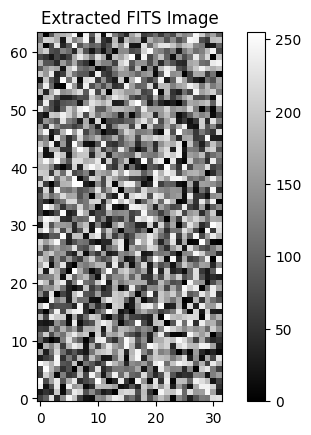

In [26]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Extracted FITS Image")
plt.show()


In [27]:
# Analyze TIME column
time_start = min(time)
time_end = max(time)
print(f"Observation Time Range: {time_start} to {time_end} seconds")

# Analyze GRT column (e.g., first entry)
print("GRT Example:", grt[0])


Observation Time Range: 189906798.52782595 to 189914506.45319542 seconds
GRT Example: [2016    1    8    2    2   37 4502]


In [29]:
# Normalize the data to range [0, 1]
image_data_normalized = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))


/var/folders/hq/85dlj2ps64xd20knck25s6lh0000gn/T/ipykernel_1360/2594206269.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis')  # Choose your colormap


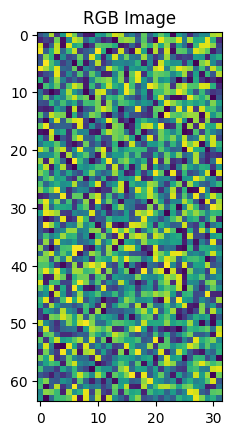

In [31]:
# Convert to RGB using a colormap
from matplotlib import cm

colormap = cm.get_cmap('viridis')  # Choose your colormap
rgb_image = colormap(image_data_normalized)  # Returns an RGBA image

# Convert RGBA to RGB if needed
rgb_image = (rgb_image[:, :, :3] * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Image")  # Hide axes
plt.show()
